In [1]:
import calendar

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
data = pd.read_pickle('../data/final.pkl').iloc[:,[0,1,2,3,7]]
data.columns = ['count', 'Distance_mean', 'Duration_Time_mean','Severity_mean','Transport']

data

count  Distance_mean  Duration_Time_mean  Severity_mean  \
State year month                                                            
AL    16   6         18       1.844778          360.000000       3.000000   
           7         21       2.810524          360.000000       3.190476   
           8         21       1.893381          360.000000       2.904762   
           9         15       2.267000          360.000000       2.133333   
           10        23       0.842522          360.000000       2.565217   
...                 ...            ...                 ...            ...   
WY    20   1          4      21.928250           29.441667       3.000000   
           3          4       2.720000          187.333333       3.500000   
           4          4       3.675750           96.704167       3.500000   
           5          2       1.695000          137.558333       3.000000   
           6          2      20.015001          144.841667       4.000000   

                  Transport  
State year month             
AL    16   6         6180.0  
           7         6007.0  
           8         6281.0  
           9         5633.0  
           10        5743.0  
...                     ...  
WY    20   1          738.0  
           3          687.0  
           4          636.0  
           5          742.0  
           6            NaN  

[2407 rows x 5 columns]

# 기본 plot

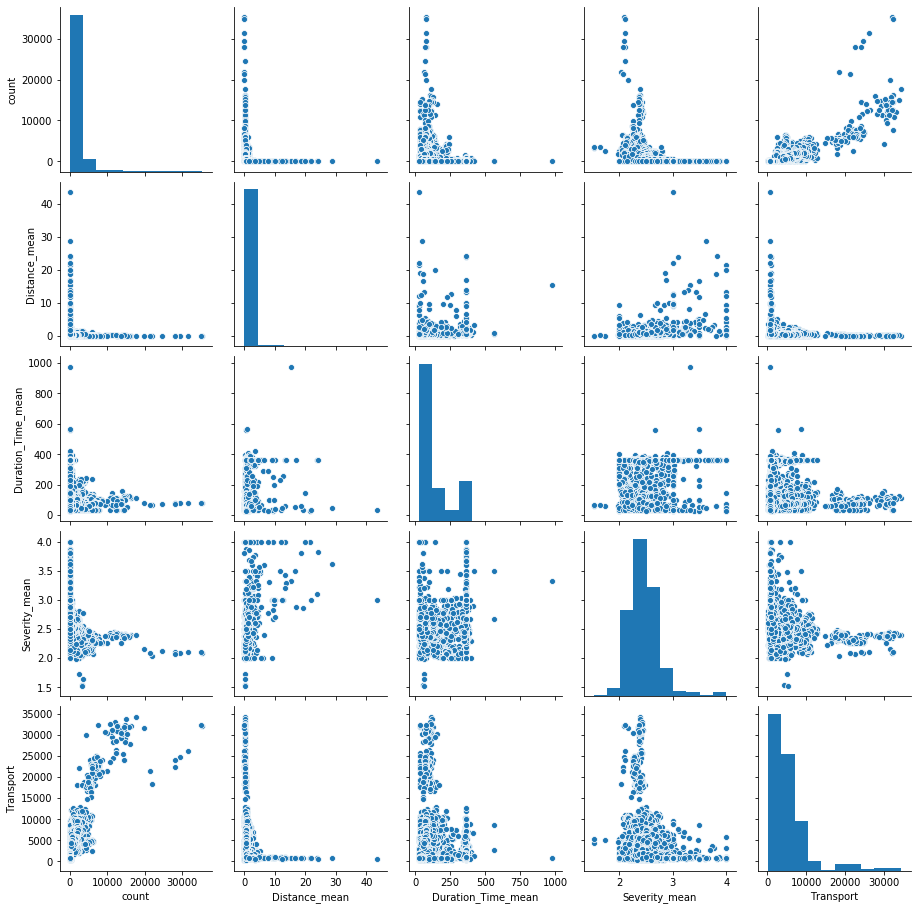

In [3]:
sns.pairplot(data)
plt.savefig('../docs/fig/fig1.png')
plt.show()

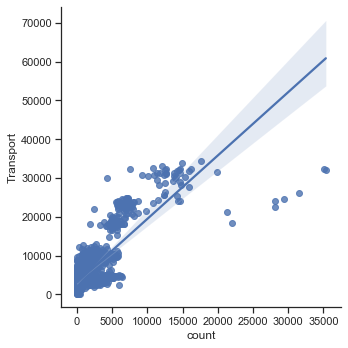

In [4]:
sns.set(style="ticks")
sns.lmplot(x='count', y= 'Transport', data=data)
plt.savefig('../docs/fig/fig2.png')
plt.show()

In [5]:
data[['count', 'Transport']].corr().iloc[0,1]

0.8048795772092443

'count', 'Distance_mean', 'Duration_Time_mean', 'Severity_mean', 'Transport' 별 scatter plot을 그려보면, 당연하게 알 수 있는 것처럼, count와 Transport간의 선형관계가 있음을 알 수 있다. 즉 사고건수는 통행량에 따라 비례하므로, $사고건수\over 통행량$의 비율 ratio를 이용하겠다.

In [6]:
data["ratio"] =  data["count"]/data["Transport"]
data

count  Distance_mean  Duration_Time_mean  Severity_mean  \
State year month                                                            
AL    16   6         18       1.844778          360.000000       3.000000   
           7         21       2.810524          360.000000       3.190476   
           8         21       1.893381          360.000000       2.904762   
           9         15       2.267000          360.000000       2.133333   
           10        23       0.842522          360.000000       2.565217   
...                 ...            ...                 ...            ...   
WY    20   1          4      21.928250           29.441667       3.000000   
           3          4       2.720000          187.333333       3.500000   
           4          4       3.675750           96.704167       3.500000   
           5          2       1.695000          137.558333       3.000000   
           6          2      20.015001          144.841667       4.000000   

                  Transport     ratio  
State year month                       
AL    16   6         6180.0  0.002913  
           7         6007.0  0.003496  
           8         6281.0  0.003343  
           9         5633.0  0.002663  
           10        5743.0  0.004005  
...                     ...       ...  
WY    20   1          738.0  0.005420  
           3          687.0  0.005822  
           4          636.0  0.006289  
           5          742.0  0.002695  
           6            NaN       NaN  

[2407 rows x 6 columns]

## 추가 전처리
index 삭제 및 20.6 행 삭제

In [7]:
data.reset_index(inplace=True)

In [8]:
trim_data = data[~((data["year"] == 20) & (data["month"] == 6))]

In [9]:
trim_data

,State,year,month,count,Distance_mean,Duration_Time_mean,Severity_mean,Transport,ratio
0,AL,16,6,18,1.844778,360.000000,3.000000,6180.0,0.002913
1,AL,16,7,21,2.810524,360.000000,3.190476,6007.0,0.003496
2,AL,16,8,21,1.893381,360.000000,2.904762,6281.0,0.003343
3,AL,16,9,15,2.267000,360.000000,2.133333,5633.0,0.002663
4,AL,16,10,23,0.842522,360.000000,2.565217,5743.0,0.004005
...,...,...,...,...,...,...,...,...,...
2402,WY,20,1,4,21.928250,29.441667,3.000000,738.0,0.005420
2403,WY,20,3,4,2.720000,187.333333,3.500000,687.0,0.005822
2404,WY,20,4,4,3.675750,96.704167,3.500000,636.0,0.006289
2405,WY,20,5,2,1.695000,137.558333,3.000000,742.0,0.002695


# 주별 plot

In [10]:
state_geo = '../data/us-states.json'

In [11]:
map1_data = trim_data.groupby('State').ratio.mean().reset_index()

In [12]:
map1 = folium.Map(location=[40,-98],zoom_start=4)

folium.Choropleth(geo_data=state_geo, fill_opacity=0.7, line_opacity=0.2,
               data=map1_data, columns=['State', 'ratio'], legend_name='ratio (%)',
               key_on='feature.id', fill_color='YlGn').add_to(map1)

map1.save('../docs/fig/map1.html')
map1

map1 : 주별 ratio

즉 색이 지날수록 교통량 대비 교통사고건수가 많음을 의미

In [13]:
map2_data = trim_data.groupby('State').Distance_mean.mean().reset_index()

In [14]:
map2 = folium.Map(location=[40,-98],zoom_start=4)

folium.Choropleth(geo_data=state_geo, fill_opacity=0.7, line_opacity=0.2,
               data=map2_data, columns=['State', 'Distance_mean'], legend_name='Distance_mean',
               key_on='feature.id', fill_color='YlGn').add_to(map2)

map2.save('../docs/fig/map2.html')
map2

map2 : 주별 Distance_mean

In [15]:
map3_data = trim_data.groupby('State').Duration_Time_mean.mean().reset_index()

In [16]:
map3 = folium.Map(location=[40,-98],zoom_start=4)

folium.Choropleth(geo_data=state_geo, fill_opacity=0.7, line_opacity=0.2,
               data=map3_data, columns=['State', 'Duration_Time_mean'], legend_name='Duration_Time_mean',
               key_on='feature.id', fill_color='YlGn').add_to(map3)

map3.save('../docs/fig/map3.html')
map3

map3 : 주별 Duration_Time_mean

In [17]:
map4_data = trim_data.groupby('State').Severity_mean.mean().reset_index()

In [18]:
map4 = folium.Map(location=[40,-98],zoom_start=4)

folium.Choropleth(geo_data=state_geo, fill_opacity=0.7, line_opacity=0.2,
               data=map4_data, columns=['State', 'Severity_mean'], legend_name='Severity_mean',
               key_on='feature.id', fill_color='YlGn').add_to(map4)

map4.save('../docs/fig/map4.html')
map4

map4 : 주별 Severity_mean

# 시계열 plot

In [19]:
time_data1 = data.reset_index().groupby(['State','month'])["count"].sum().reset_index()
time_data1

,State,month,count
0,AL,1,4031
1,AL,2,3689
2,AL,3,4228
3,AL,4,3789
4,AL,5,4153
...,...,...,...
580,WY,8,29
581,WY,9,32
582,WY,10,35
583,WY,11,99


In [20]:
time_data2 = time_data1.groupby('State')["count"].sum().sort_values(ascending=False)

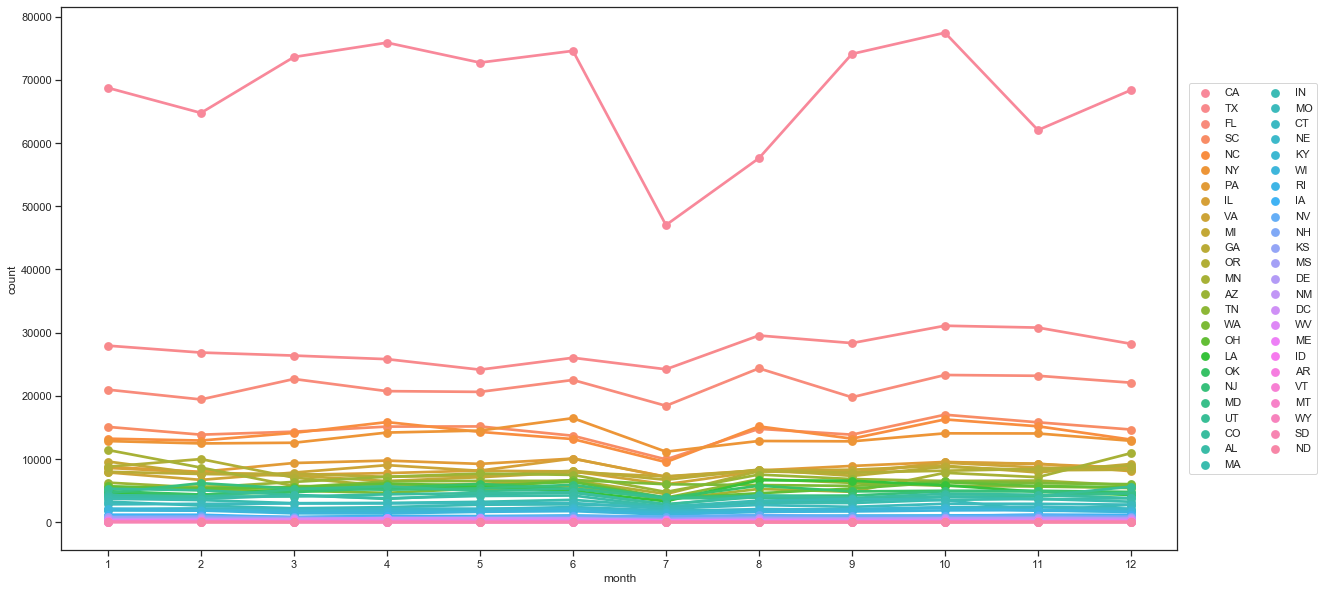

In [21]:
plt.figure(figsize=(20, 10))
sns.pointplot(data = time_data1, x = "month", y = "count", hue = "State", hue_order=time_data2.index ,err_style=None)
plt.legend(loc='right', bbox_to_anchor=(1.13, 0.5), ncol=2)
plt.savefig('../docs/fig/fig3.png')
plt.show()

fig3 : 전체 state 월별 사고건수 (오른쪽 범례는 감소하는 순서로)

In [22]:
top_8 = time_data1.groupby('State')["count"].sum().sort_values(ascending=False).head(8).index

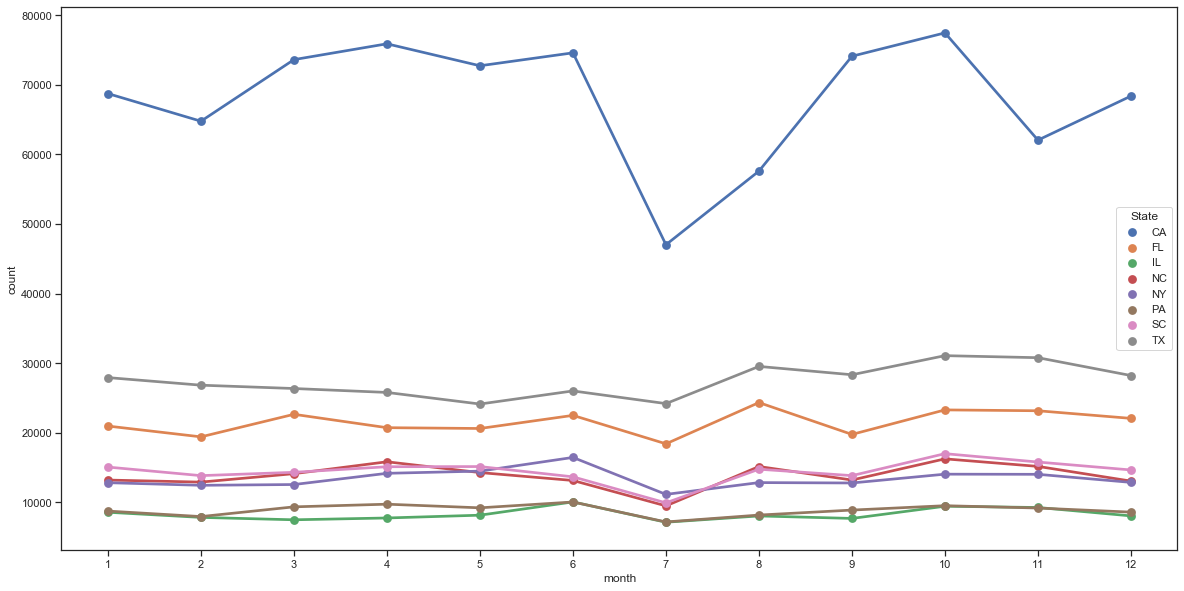

In [23]:
plt.figure(figsize=(20, 10))
sns.pointplot(data = time_data1[time_data1.State.isin(top_8)], x = "month", y = "count", hue = "State" ,err_style=None)
plt.savefig('../docs/fig/fig4.png')
plt.show()

fig4 : 상위 8개주

In [24]:
time_data2 = data.reset_index()

In [25]:
year_month_str = (time_data2.year+'/'+time_data2.month.astype('str'))[:49]

In [26]:
time_data2['year_month']=(time_data2.year.astype('float64')+time_data2.month/12)

In [27]:
time_data2.drop(['year','month'],axis=1, inplace=True)

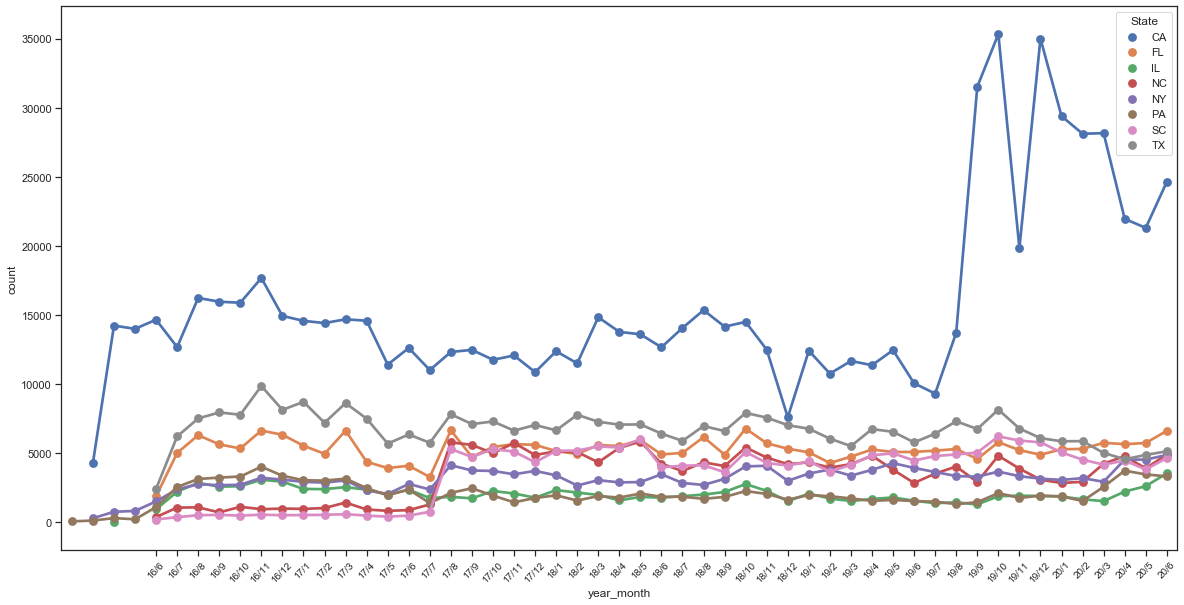

In [28]:
plt.figure(figsize=(20, 10))
sns.pointplot(data=time_data2[time_data2.State.isin(top_8)], x="year_month", y="count", hue="State", err_style=None)
plt.xticks(np.arange(0, len(year_month_str))+4,
           year_month_str, fontsize=10, rotation=45)
plt.savefig('../docs/fig/fig5.png')
plt.show()

fig5 : 상위 8개 사고건수

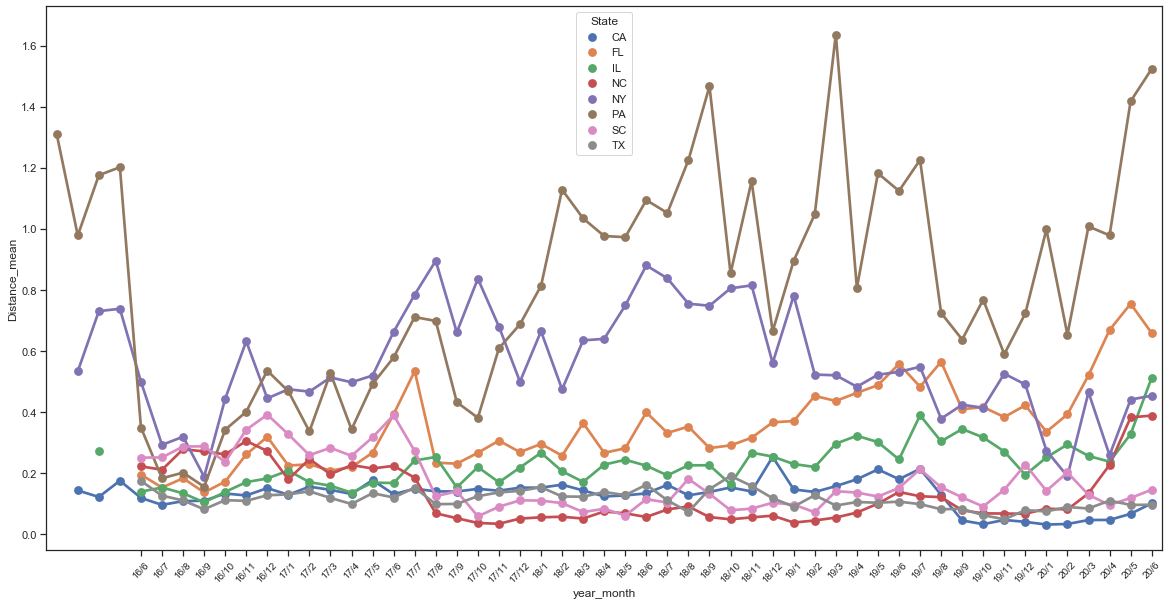

In [29]:
plt.figure(figsize=(20, 10))
sns.pointplot(data = time_data2[time_data2.State.isin(top_8)], x = "year_month", y = "Distance_mean", hue = "State" ,err_style=None)
plt.xticks(np.arange(0, len(year_month_str))+4,
           year_month_str, fontsize=10, rotation=45)
plt.savefig('../docs/fig/fig6.png')
plt.show()

fig6 : 상위 8개 Distance_mean

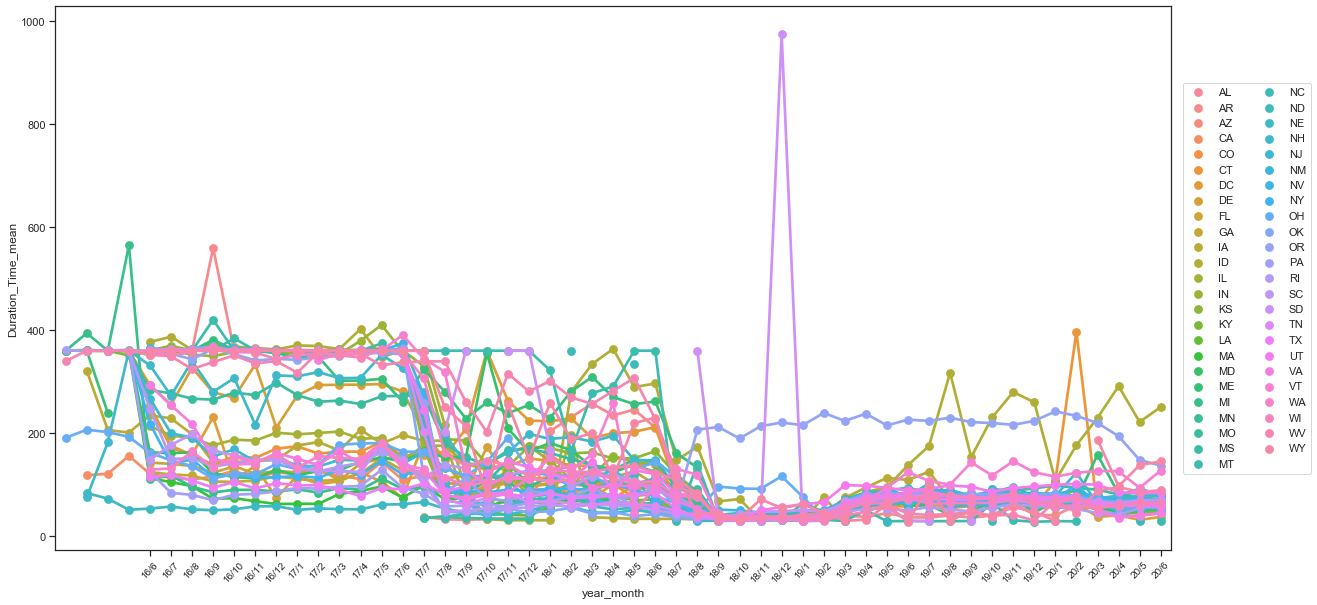

In [30]:
plt.figure(figsize=(20, 10))
sns.pointplot(data = time_data2, x = "year_month", y = "Duration_Time_mean", hue = "State" ,err_style=None)
plt.xticks(np.arange(0, len(year_month_str))+4,
           year_month_str, fontsize=10, rotation=45)
plt.legend(loc='right', bbox_to_anchor=(1.13, 0.5), ncol=2)
plt.savefig('../docs/fig/fig7.png')
plt.show()

fig7 : 전체 Duration_Time_mean

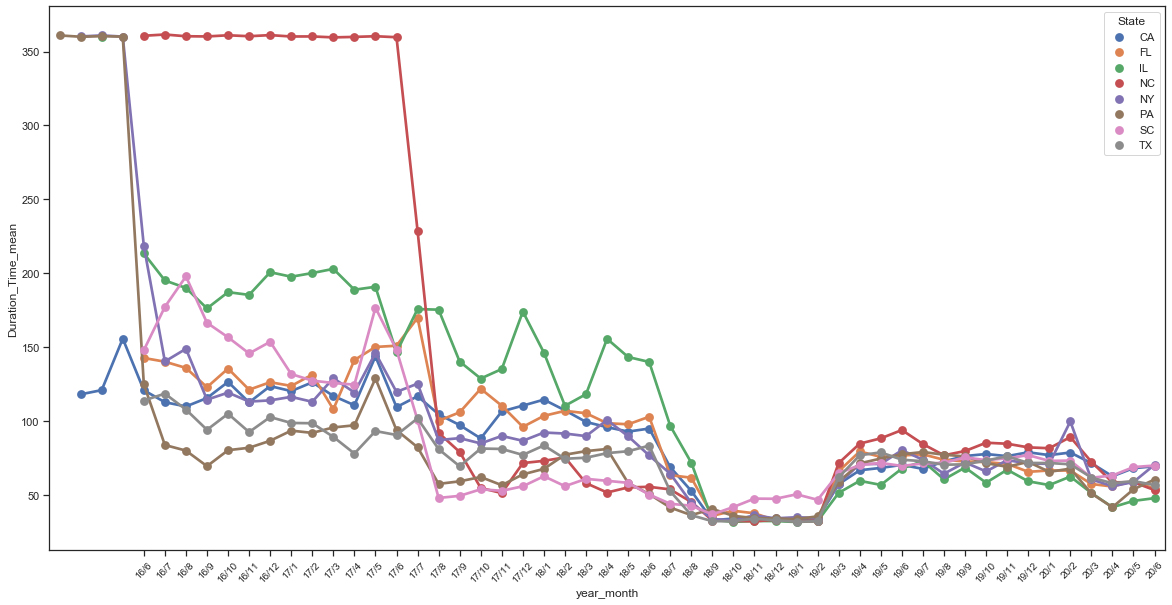

In [32]:
plt.figure(figsize=(20, 10))
sns.pointplot(data = time_data2[time_data2.State.isin(top_8)], x = "year_month", y = "Duration_Time_mean", hue = "State" ,err_style=None)
plt.xticks(np.arange(0, len(year_month_str))+4,
           year_month_str, fontsize=10, rotation=45)
plt.savefig('../docs/fig/fig8.png')
plt.show()

fig8 : 상위 8개 Duration_Time_mean

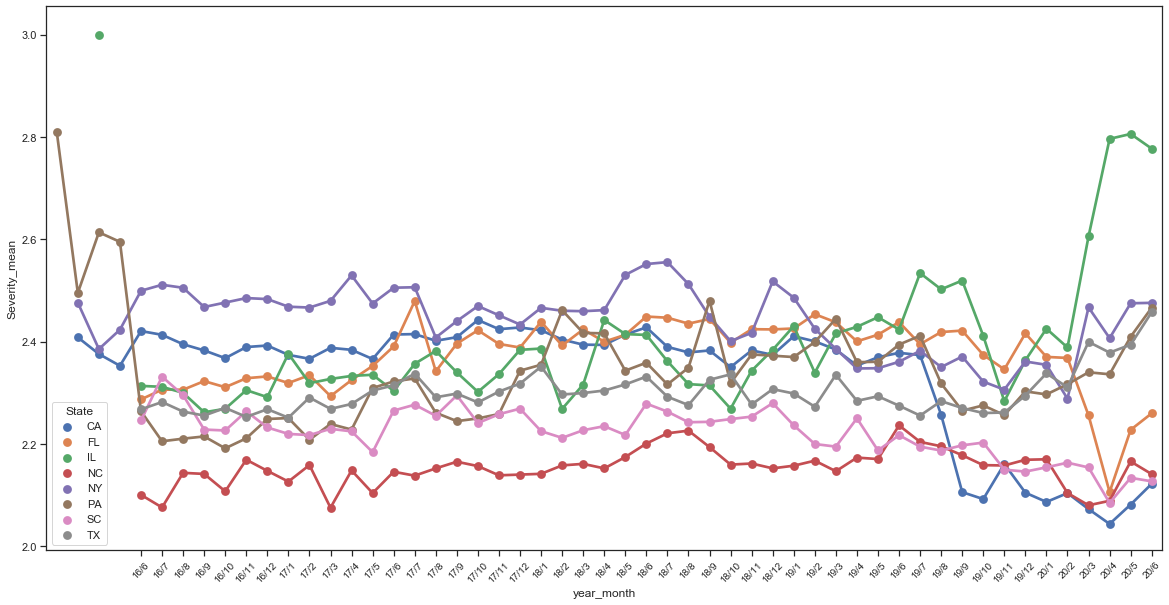

In [33]:
plt.figure(figsize=(20, 10))
sns.pointplot(data = time_data2[time_data2.State.isin(top_8)], x = "year_month", y = "Severity_mean", hue = "State" ,err_style=None)
plt.xticks(np.arange(0, len(year_month_str))+4,
           year_month_str, fontsize=10, rotation=45)
plt.savefig('../docs/fig/fig9.png')
plt.show()

fig9 : 상위 8개 Severity_mean